<a href="https://colab.research.google.com/github/grkidwell/time_based_waveforms/blob/master/unit_waveforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit Waveforms

### Libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np

### Classes

In [0]:
class Three_state:
    
    def __init__(self,t1,t2,t3=0):
      
        self.t1,self.t2,self.t3 = t1,t2,t3
        self.Ts = self.t1+self.t2+self.t3
    
    def step(self,t):
        if t<0:
            kd=0.0
        elif t==0:
            kd=0.0
        else:
            kd=1.0
        return kd
            
    def t1_unit_pulse(self,t):
        if t<0:
            k=1.0
        else:
            k=self.step(self.t1-t)
        return k
      
    def t3_unit_pulse(self,t):
        return self.step(t-self.t1-self.t2)
      
    def t2_unit_pulse(self,t):
        return 1-self.t1_unit_pulse(t)-self.t3_unit_pulse(t)
    
    
    def repeating(self,t):
        period=self.Ts
        return t-(t//period)*period

### Input parameters

In [0]:
Vin = 12
Vout = 6
fs = 0.5e6

duty = Vout/Vin
Ts = 1/fs
t1=duty*Ts
t2=(1-duty)*Ts

numdatapoints=1000  
numcycles = 10
tstep = np.round(numcycles*Ts/numdatapoints,10)

### Create single pulse sequence

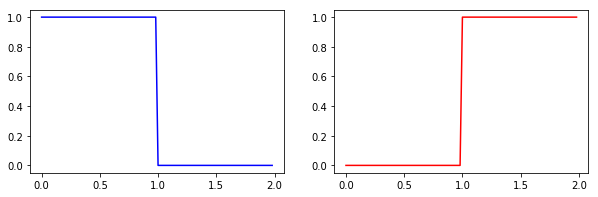

In [27]:
tarray=np.arange(0,Ts,tstep, dtype=float)
tarray_nperiod=np.arange(0,numcycles*Ts,tstep, dtype=float)


singlecycleobject=Three_state(t1=t1,t2=t2)
t1singlecycle=np.vectorize(singlecycleobject.t1_unit_pulse)
t2singlecycle=np.vectorize(singlecycleobject.t2_unit_pulse)




f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.plot(tarray*1e6,t1singlecycle(tarray), 'b')
ax2.plot(tarray*1e6,t2singlecycle(tarray), 'r')

### Create multi pulse sequence

In [0]:
t1multicycle=t1singlecycle(singlecycleobject.repeating(tarray_nperiod))
t2multicycle=t2singlecycle(singlecycleobject.repeating(tarray_nperiod))


### Results

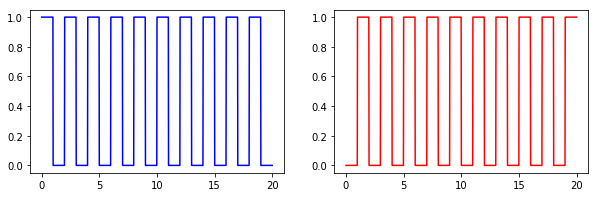

In [33]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.plot(tarray_nperiod*1e6,t1multicycle, 'b')
ax2.plot(tarray_nperiod*1e6,t2multicycle, 'r')
